# Comparison of Global Memory Usage on the GTX 1080

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/GTX1080

# Global memory paths
global_directory_path = "Data/GlobalTenEighty"
global_paths = []

# List of all files in the directory
for filename in os.listdir(global_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(global_directory_path, filename)
  if os.path.isfile(file_path):
      global_paths.append(file_path)
global_paths = sorted(global_paths)

# No memory trial
clean_path = 'Data/tenEightyClean.csv'

# =================================
# Read in the data
# =================================
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/GTX1080
import numpy as np

def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # Convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

# Load equivalent global memory trials
global_ivls = read_ivls(global_paths)

# Load clean cache intervals
clean_ivls = read_ivls(clean_path, single=True)

# Verify paths
global_paths, clean_path

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/GTX1080
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/GTX1080


(['Data/GlobalTenEighty/AtenEighty500.csv',
  'Data/GlobalTenEighty/DtenEighty2000.csv'],
 'Data/tenEightyClean.csv')

In [2]:
# Extract memory in GB for plot label
import re

# Loop 12 times to reach max shared memory amount
SHARED_LOOP = 12

# Number of threads executing at the same time
CONCURRENT_THREADS = 40960

# Size of a float in bytes
FLOAT_SIZE = 4

# Number of result arrays (z1 and z2)
NUM_RESULT = 2

# Number of input arrays (x and y)
NUM_INPUT = 2

# List of global memory used in GB for each trial
gb_list = [round(
  ((NUM_INPUT * CONCURRENT_THREADS * FLOAT_SIZE) + NUM_RESULT * SHARED_LOOP * CONCURRENT_THREADS * FLOAT_SIZE *
  int(re.search(r'\d+', path).group())) / 1e9, 
  2) 
  for path in global_paths
]

# Verify GB usage
gb_list

[1.97, 7.86]

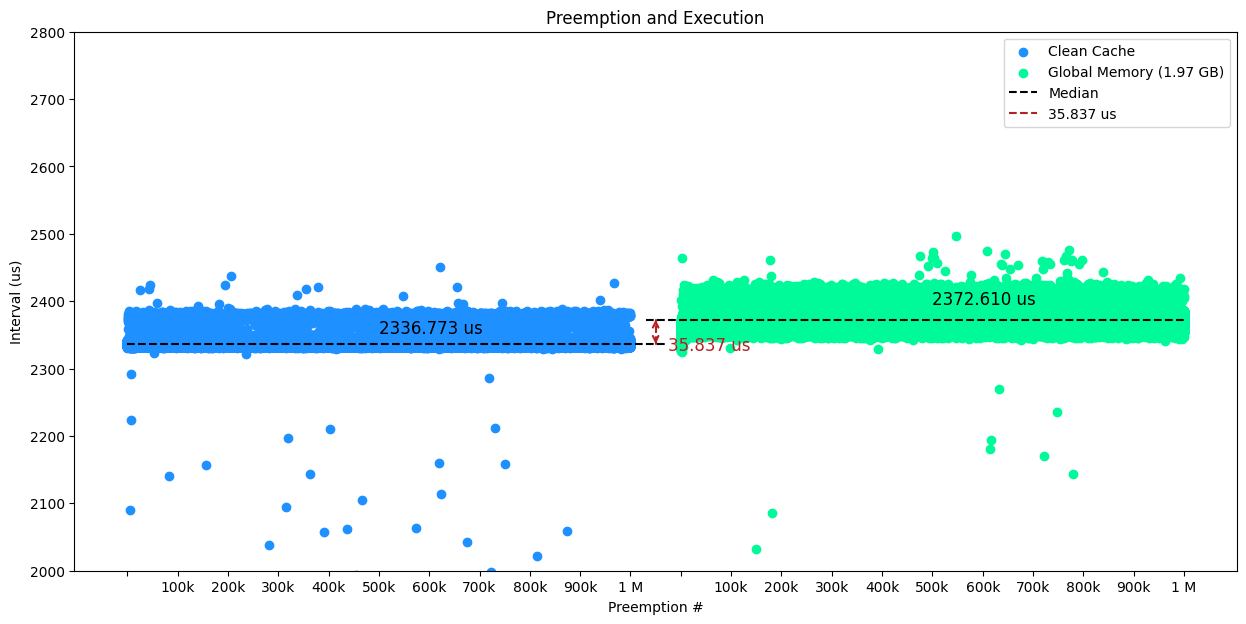

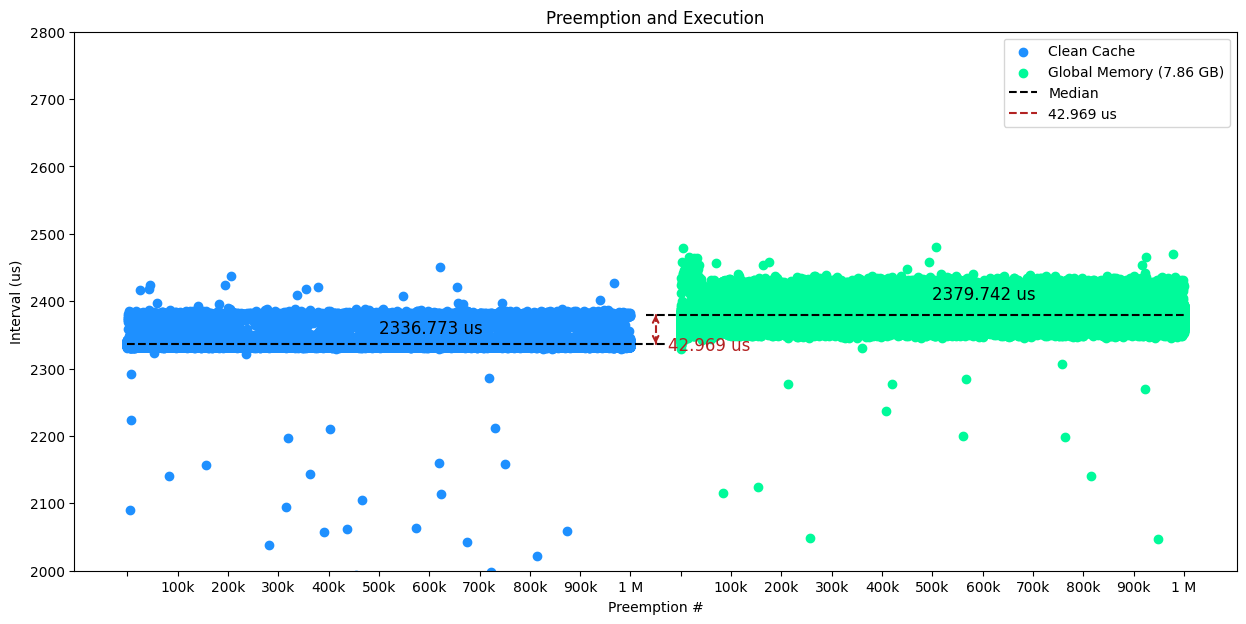

In [6]:
TIMESLICE_LENGTH = 2000

def plot_ivls(left_ivls, right_ivls, left_label, right_label=None, 
              right_label_list=None, dual=False,):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if right_label_list is None:
    right_label_list = [right_label for i in range(len(right_ivls))]
  if dual:
    for i, left, right in enumerate(zip(left_ivls, right_ivls)):
      plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=TIMESLICE_LENGTH, upperBound=TIMESLICE_LENGTH+800, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])  
  else:
    for i, ivls in enumerate(right_ivls):
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=TIMESLICE_LENGTH, upperBound=TIMESLICE_LENGTH+800, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])

global_label_list = [f"Global Memory ({i} GB)" for i in gb_list]
plot_ivls(clean_ivls, global_ivls, left_label="Clean Cache", right_label_list=global_label_list)